In [1]:
from collections import Counter, defaultdict
from copy import deepcopy
from pprint import pprint

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from scipy.spatial.distance import correlation

from graph_builders.basic_graph import create_full_graph
from graph_builders.more_weighted_graph import create_full_graph as w_create
from graph_builders.only_same_meeting_graph import create_full_graph as s_create

In [3]:
G: nx.Graph = create_full_graph()
Gw: nx.Graph = w_create()
Gs: nx.Graph = s_create()

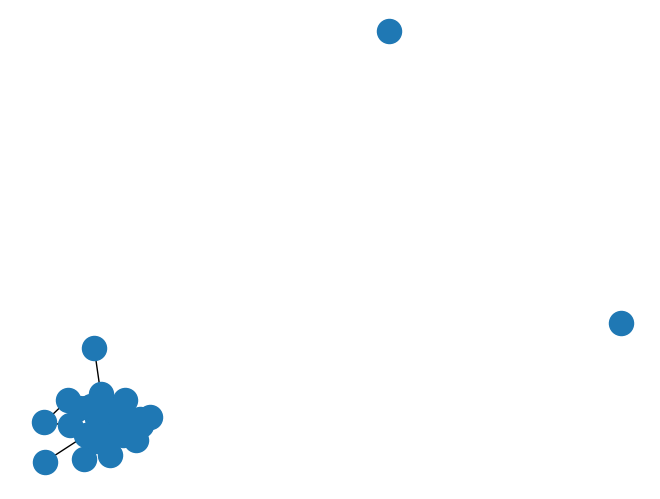

In [24]:
nx.draw(Gs)

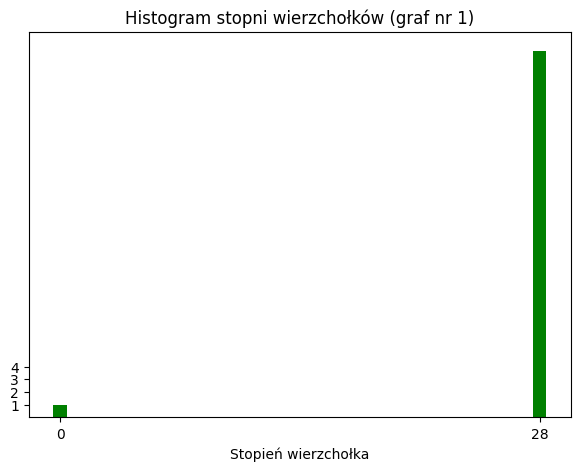

In [63]:
degrees = [x[1] for x in sorted(G.degree(), key=lambda x: x[1])]

degrees_hist = Counter(degrees)

x, y = list(degrees_hist.keys()), list(degrees_hist.values())

plt.figure(figsize=(7, 5))
plt.bar(x, y, color='green')
plt.xticks(x)
plt.yticks(range(1,5))
plt.title('Histogram stopni wierzchołków (graf nr 1)')
plt.xlabel('Stopień wierzchołka')
# for i in range(len(x)):
#     plt.text(x[i], y[i] + 0.05, y[i], ha='center')
plt.draw()

In [72]:
sorted(dict(Gs.degree).items(), key=lambda x: x[1], reverse=True)

[('Johannes Hahn (Commissioner)', 15),
 ('Thierry Breton (Commissioner)', 14),
 ('Maroš Šefčovič (Vice-President)', 11),
 ('Virginijus Sinkevičius (Commissioner)', 11),
 ('Margrethe Vestager (Executive Vice-President)', 9),
 ('Mariya Gabriel (Commissioner)', 9),
 ('Didier Reynders (Commissioner)', 8),
 ('Frans Timmermans (Executive Vice-President)', 8),
 ('Ursula von der Leyen (President)', 8),
 ('Valdis Dombrovskis (Executive Vice-President)', 8),
 ('Mairead McGuinness (Commissioner)', 7),
 ('Nicolas Schmit (Commissioner)', 7),
 ('Elisa Ferreira (Commissioner)', 6),
 ('Ylva Johansson (Commissioner)', 6),
 ('Adina-Ioana Vălean (Commissioner)', 5),
 ('Paolo Gentiloni (Commissioner)', 5),
 ('Věra Jourová (Vice-President)', 5),
 ('Wopke Hoekstra (Commissioner)', 5),
 ('Iliana Ivanova (Commissioner)', 4),
 ('Margaritis Schinas (Vice-President)', 4),
 ('Olivér Várhelyi (Commissioner)', 4),
 ('Phil Hogan (Commissioner)', 4),
 ('Kadri Simson (Commissioner)', 3),
 ('Dubravka Šuica (Vice-Presid

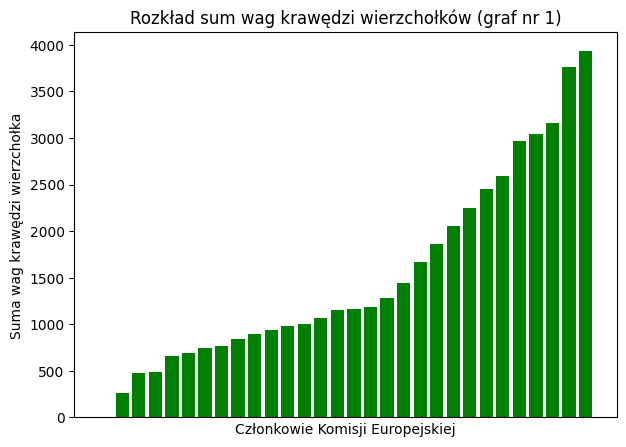

In [66]:
degrees_weights = [x[1] for x in sorted(G.degree(weight='weight'), key=lambda x: x[1])]

plt.figure(figsize=(7, 5))
plt.bar(range(len(degrees_weights)), degrees_weights, color='green')
plt.xticks([])
plt.title('Rozkład sum wag krawędzi wierzchołków (graf nr 1)')
plt.xlabel('Członkowie Komisji Europejskiej')
plt.ylabel('Suma wag krawędzi wierzchołka')
plt.show()

In [300]:
G.edges.data()

EdgeDataView([('Adina-Ioana Vălean (Commissioner)', 'Dubravka Šuica (Vice-President)', {'weight': 10}), ('Adina-Ioana Vălean (Commissioner)', 'Margaritis Schinas (Vice-President)', {'weight': 30}), ('Adina-Ioana Vălean (Commissioner)', 'Paolo Gentiloni (Commissioner)', {'weight': 26}), ('Adina-Ioana Vălean (Commissioner)', 'Věra Jourová (Vice-President)', {'weight': 29}), ('Adina-Ioana Vălean (Commissioner)', 'Janusz Wojciechowski (Commissioner)', {'weight': 24}), ('Adina-Ioana Vălean (Commissioner)', 'Jutta Urpilainen (Commissioner)', {'weight': 12}), ('Adina-Ioana Vălean (Commissioner)', 'Frans Timmermans (Executive Vice-President)', {'weight': 128}), ('Adina-Ioana Vălean (Commissioner)', 'Johannes Hahn (Commissioner)', {'weight': 118}), ('Adina-Ioana Vălean (Commissioner)', 'Didier Reynders (Commissioner)', {'weight': 57}), ('Adina-Ioana Vălean (Commissioner)', 'Ursula von der Leyen (President)', {'weight': 60}), ('Adina-Ioana Vălean (Commissioner)', 'Margrethe Vestager (Executive V

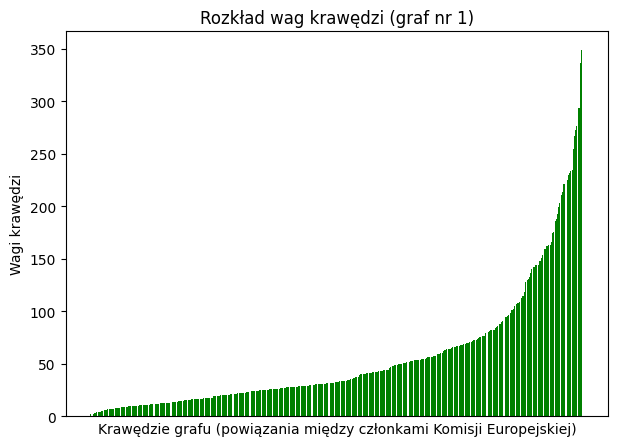

In [69]:
weights = [x[2]['weight'] for x in sorted(G.edges.data(), key=lambda x: x[2]['weight'])]

plt.figure(figsize=(7, 5))
plt.bar(range(len(weights)), weights, color='green')
plt.xticks([])
plt.title('Rozkład wag krawędzi (graf nr 1)')
plt.xlabel('Krawędzie grafu (powiązania między członkami Komisji Europejskiej)')
plt.ylabel('Wagi krawędzi')
plt.show()

In [298]:
G.edges.data()

EdgeDataView([('Adina-Ioana Vălean (Commissioner)', 'Dubravka Šuica (Vice-President)', {'weight': 10}), ('Adina-Ioana Vălean (Commissioner)', 'Margaritis Schinas (Vice-President)', {'weight': 30}), ('Adina-Ioana Vălean (Commissioner)', 'Paolo Gentiloni (Commissioner)', {'weight': 26}), ('Adina-Ioana Vălean (Commissioner)', 'Věra Jourová (Vice-President)', {'weight': 29}), ('Adina-Ioana Vălean (Commissioner)', 'Janusz Wojciechowski (Commissioner)', {'weight': 24}), ('Adina-Ioana Vălean (Commissioner)', 'Jutta Urpilainen (Commissioner)', {'weight': 12}), ('Adina-Ioana Vălean (Commissioner)', 'Frans Timmermans (Executive Vice-President)', {'weight': 128}), ('Adina-Ioana Vălean (Commissioner)', 'Johannes Hahn (Commissioner)', {'weight': 118}), ('Adina-Ioana Vălean (Commissioner)', 'Didier Reynders (Commissioner)', {'weight': 57}), ('Adina-Ioana Vălean (Commissioner)', 'Ursula von der Leyen (President)', {'weight': 60}), ('Adina-Ioana Vălean (Commissioner)', 'Margrethe Vestager (Executive V

In [59]:
degrees_weights = [x[1] for x in sorted(Gs.degree(weight='weight'), key=lambda x: x[1])]
weights = [x[2]['weight'] for x in sorted(Gs.edges.data(), key=lambda x: x[2]['weight'])]

for x in (
    np.mean(degrees_weights),
    np.median(degrees_weights),
    np.std(degrees_weights),
    np.min(degrees_weights),
    np.max(degrees_weights),
    np.mean(weights),
    np.median(weights),
    np.std(weights),
    np.min(weights),
    np.max(weights),
):
    print(x)

119.06666666666666
69.0
111.32742499292597
0
409
20.528735632183906
9.0
31.404970351350283
1
175


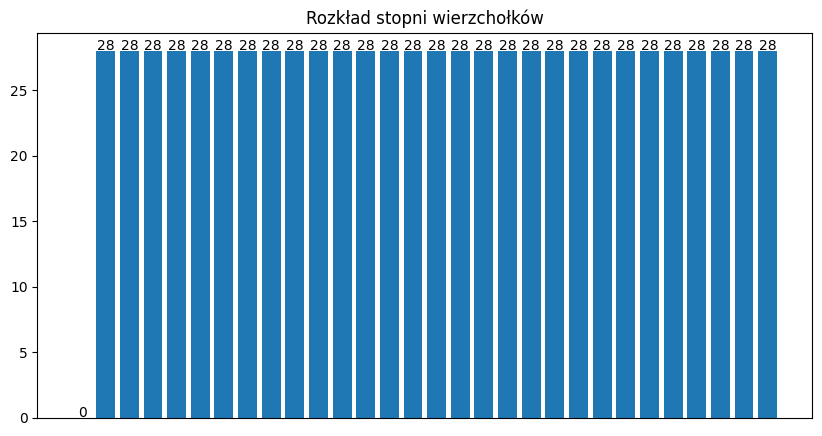

In [21]:
x, y = range(len(degrees)), degrees

plt.figure(figsize=(10, 5))
plt.bar(x, y)
plt.xticks([])
plt.title('Rozkład stopni wierzchołków')
for i in range(len(x)):
    plt.text(x[i], y[i] + 0.1, y[i], ha='center')
plt.draw()

In [288]:
len(G.nodes)

31

In [214]:
G.nodes['Adina-Ioana Vălean (Commissioner)']
G.degree

DegreeView({'Adina-Ioana Vălean (Commissioner)': 31, 'Didier Reynders (Commissioner)': 32, 'Dubravka Šuica (Vice-President)': 31, 'Elisa Ferreira (Commissioner)': 30, 'Frans Timmermans (Executive Vice-President)': 32, 'Helena Dalli (Commissioner)': 32, 'Iliana Ivanova (Commissioner)': 30, 'Janez Lenarčič (Commissioner)': 32, 'Janusz Wojciechowski (Commissioner)': 31, 'Johannes Hahn (Commissioner)': 32, 'Josep Borrell (Vice-President)': 0, 'Jutta Urpilainen (Commissioner)': 32, 'Kadri Simson (Commissioner)': 30, 'Mairead McGuinness (Commissioner)': 32, 'Margaritis Schinas (Vice-President)': 30, 'Margrethe Vestager (Executive Vice-President)': 32, 'Mariya Gabriel (Commissioner)': 32, 'Maroš Šefčovič (Vice-President)': 30, 'Nicolas Schmit (Commissioner)': 31, 'Olivér Várhelyi (Commissioner)': 31, 'Paolo Gentiloni (Commissioner)': 32, 'Phil Hogan (Commissioner)': 31, 'Stella Kyriakides (Commissioner)': 31, 'Thierry Breton (Commissioner)': 32, 'Ursula von der Leyen (President)': 32, 'Valdis

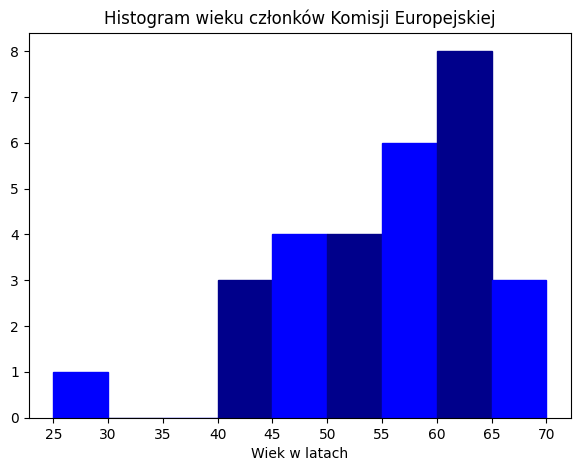

In [48]:
age_data = [x.get('age') for x in dict(Gs.nodes.data()).values()]
age_data
fig, ax = plt.subplots()
n, bins, patches = ax.hist([x for x in age_data if x], bins=range(25, 75, 5))

fig.set_figheight(5)
fig.set_figwidth(7)
ax.xaxis.set_label_text('Wiek w latach')

plt.title('Histogram wieku członków Komisji Europejskiej')


for i in range(len(n)):
    patches[i].set_color('darkblue' if i % 2 else 'blue')

plt.xticks(range(25, 75, 5))
plt.show()

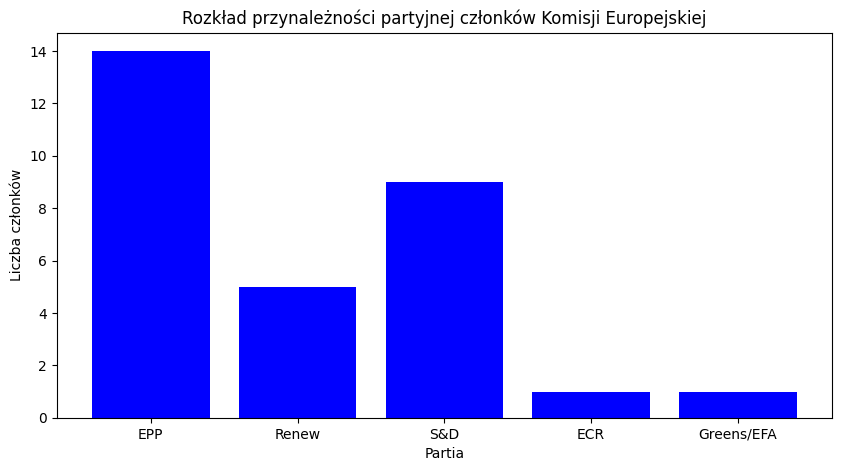

In [214]:
party_data = [x.get('political_group') for x in dict(G.nodes.data()).values()]

party_count = Counter(party_data)

plt.figure(figsize=(10, 5))
plt.bar(party_count.keys(), party_count.values(), color='blue')
plt.title('Rozkład przynależności partyjnej członków Komisji Europejskiej')
plt.ylabel('Liczba członków')
plt.xlabel('Partia')
plt.show()

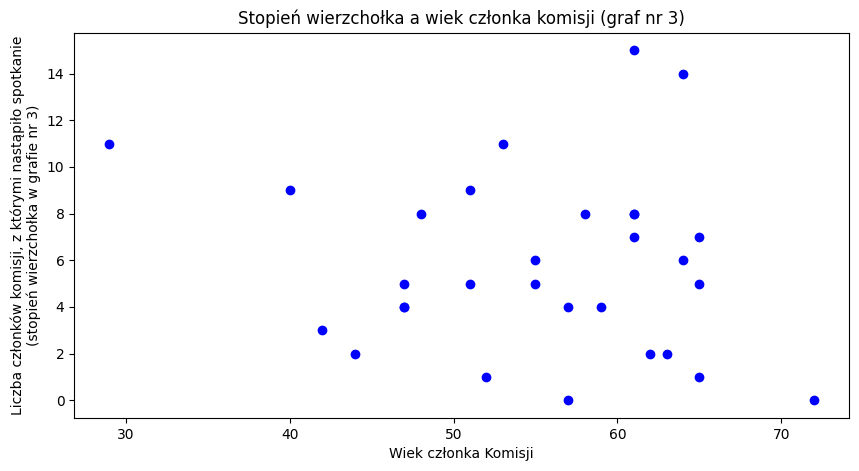

0.1364974348375947


In [207]:
X = list()
Y = list()
for name, attrs in Gs.nodes.data():
    X.append(attrs['age'])
    Y.append(Gs.degree()[name])

# corr, _ = pearsonr(X, Y)
corr1 = correlation(X, Y)

plt.figure(figsize=(10,5))
plt.ylabel('Liczba członków komisji, z którymi nastąpiło spotkanie\n(stopień wierzchołka w grafie nr 3)')
plt.xlabel('Wiek członka Komisji')
plt.title('Stopień wierzchołka a wiek członka komisji (graf nr 3)')
plt.plot(X, Y, 'o', color='blue')
plt.show()

print(corr1 - 1)


In [103]:
print(Y)

[28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 0, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28]


In [18]:
weights_age_bins = {x: [] for x in range(25, 70, 5)}
for name, attrs in Gs.nodes.data():
    for x in weights_age_bins.keys():
        try:
            if x <= attrs['age'] < x + 5:
                weights_age_bins[x].append(Gw.degree(weight='weight')[name])
                break
        except KeyError:
            continue

In [120]:
degrees_age_bins = {x: [] for x in range(25, 70, 5)}
for name, attrs in Gs.nodes.data():
    for x in degrees_age_bins.keys():
        try:
            if x <= attrs['age'] < x + 5:
                degrees_age_bins[x].append(Gs.degree(weight='weight')[name])
                break
        except KeyError:
            continue

In [93]:
np.mean([x[1] for x in dict(Gs.degree(weight='weight')).items()])

np.float64(119.06666666666666)

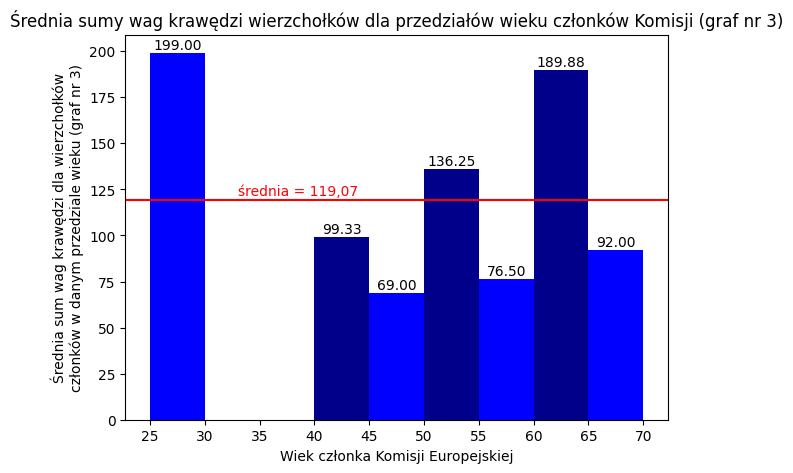

In [98]:
def plot_weights_age(bins=weights_age_bins, mean_=True):

    fig, ax = plt.subplots()
    fig.set_figheight(5)
    fig.set_figwidth(7)

    for k, v in bins.items():
        if mean_:
            x = [np.mean(v) if v else 0.0]
        else:
            x = [np.sum(v)]
        y = [k, k + 5]
        ax.stairs(x, y, fill=True, color='blue' if k % 10 else 'darkblue')
        if x[0]:
            if mean_:
                plt.text(np.mean(y), x[0] + 2, f'{x[0]:.2f}', ha='center')
            else:
                plt.text(np.mean(y), x[0] + 20, f'{x[0]}', ha='center')

    plt.xticks(range(25, 75, 5))
    if mean_:
        # plt.title('Średnia stopni wierzchołków dla przedziałów wieku członków Komisji (graf nr 3)')
        plt.title('Średnia sumy wag krawędzi wierzchołków dla przedziałów wieku członków Komisji (graf nr 3)')
    else:
        # plt.title('Suma stopni wierzchołków dla przedziałów wieku członków Komisji (graf nr 3)')
        plt.title('Suma wag krawędzi wierzchołków dla przedziałów wieku członków Komisji (graf nr 3)')
    plt.xlabel('Wiek członka Komisji Europejskiej')
    if mean_:
        # plt.ylabel('Średnia stopni wierzchołków\nczłonków w danym przedziale wieku')
        plt.ylabel('Średnia sum wag krawędzi dla wierzchołków\nczłonków w danym przedziale wieku (graf nr 3)')
        plt.axline((25, 119.07), (70, 119.07), color='red')
        plt.text(33, 122, 'średnia = 119,07', color='red')
    else:
        # plt.ylabel('Suma stopni wierzchołków\nczłonków w danym przedziale wieku')
        plt.ylabel('Suma wag krawędzi dla wierzchołków\nczłonków w danym przedziale wieku (graf nr 3)')
    plt.show()

plot_weights_age(degrees_age_bins, mean_=True)

In [121]:
pearsonr([sum(v) for v in degrees_age_bins.values()], n)

PearsonRResult(statistic=np.float64(0.8751910163098724), pvalue=np.float64(0.0019975043789465523))

In [35]:
names_age = defaultdict(list)
for name, attrs in Gs.nodes.data():
    names_age[name.split('(')[1]].append((name, attrs['age']))

dict(names_age)

{'Commissioner)': [('Adina-Ioana Vălean (Commissioner)', 51),
  ('Didier Reynders (Commissioner)', 61),
  ('Elisa Ferreira (Commissioner)', 64),
  ('Helena Dalli (Commissioner)', 57),
  ('Iliana Ivanova (Commissioner)', 47),
  ('Janez Lenarčič (Commissioner)', 52),
  ('Janusz Wojciechowski (Commissioner)', 65),
  ('Johannes Hahn (Commissioner)', 61),
  ('Jutta Urpilainen (Commissioner)', 44),
  ('Kadri Simson (Commissioner)', 42),
  ('Mairead McGuinness (Commissioner)', 61),
  ('Mariya Gabriel (Commissioner)', 40),
  ('Nicolas Schmit (Commissioner)', 65),
  ('Olivér Várhelyi (Commissioner)', 47),
  ('Paolo Gentiloni (Commissioner)', 65),
  ('Phil Hogan (Commissioner)', 59),
  ('Stella Kyriakides (Commissioner)', 63),
  ('Thierry Breton (Commissioner)', 64),
  ('Virginijus Sinkevičius (Commissioner)', 29),
  ('Wopke Hoekstra (Commissioner)', 47),
  ('Ylva Johansson (Commissioner)', 55)],
 'Vice-President)': [('Dubravka Šuica (Vice-President)', 62),
  ('Josep Borrell (Vice-President)', 7

In [36]:
correlation(X, Y)

np.float64(0.9860872021378349)

In [38]:
len(G.nodes.data())
for name, attr in G.nodes.data():
    print(name, attr)

Adina-Ioana Vălean (Commissioner) {'age': 51, 'education': ['Mathematics', 'Security and Defence Studies', 'International Relations'], 'political_group': 'EPP'}
Didier Reynders (Commissioner) {'age': 61, 'education': ['Law'], 'political_group': 'Renew'}
Dubravka Šuica (Vice-President) {'age': 62, 'education': ['Humanities and Languages', 'Social Sciences'], 'political_group': 'EPP'}
Elisa Ferreira (Commissioner) {'age': 64, 'education': ['Economics'], 'political_group': 'S&D'}
Frans Timmermans (Executive Vice-President) {'age': 58, 'education': ['Law', 'Humanities and Languages'], 'political_group': 'S&D'}
Helena Dalli (Commissioner) {'age': 57, 'education': ['Political Science', 'Social Sciences'], 'political_group': 'S&D'}
Iliana Ivanova (Commissioner) {'age': 47, 'education': ['Economics'], 'political_group': 'EPP'}
Janez Lenarčič (Commissioner) {'age': 52, 'education': ['Law'], 'political_group': 'Renew'}
Janusz Wojciechowski (Commissioner) {'age': 65, 'education': ['Law'], 'politi

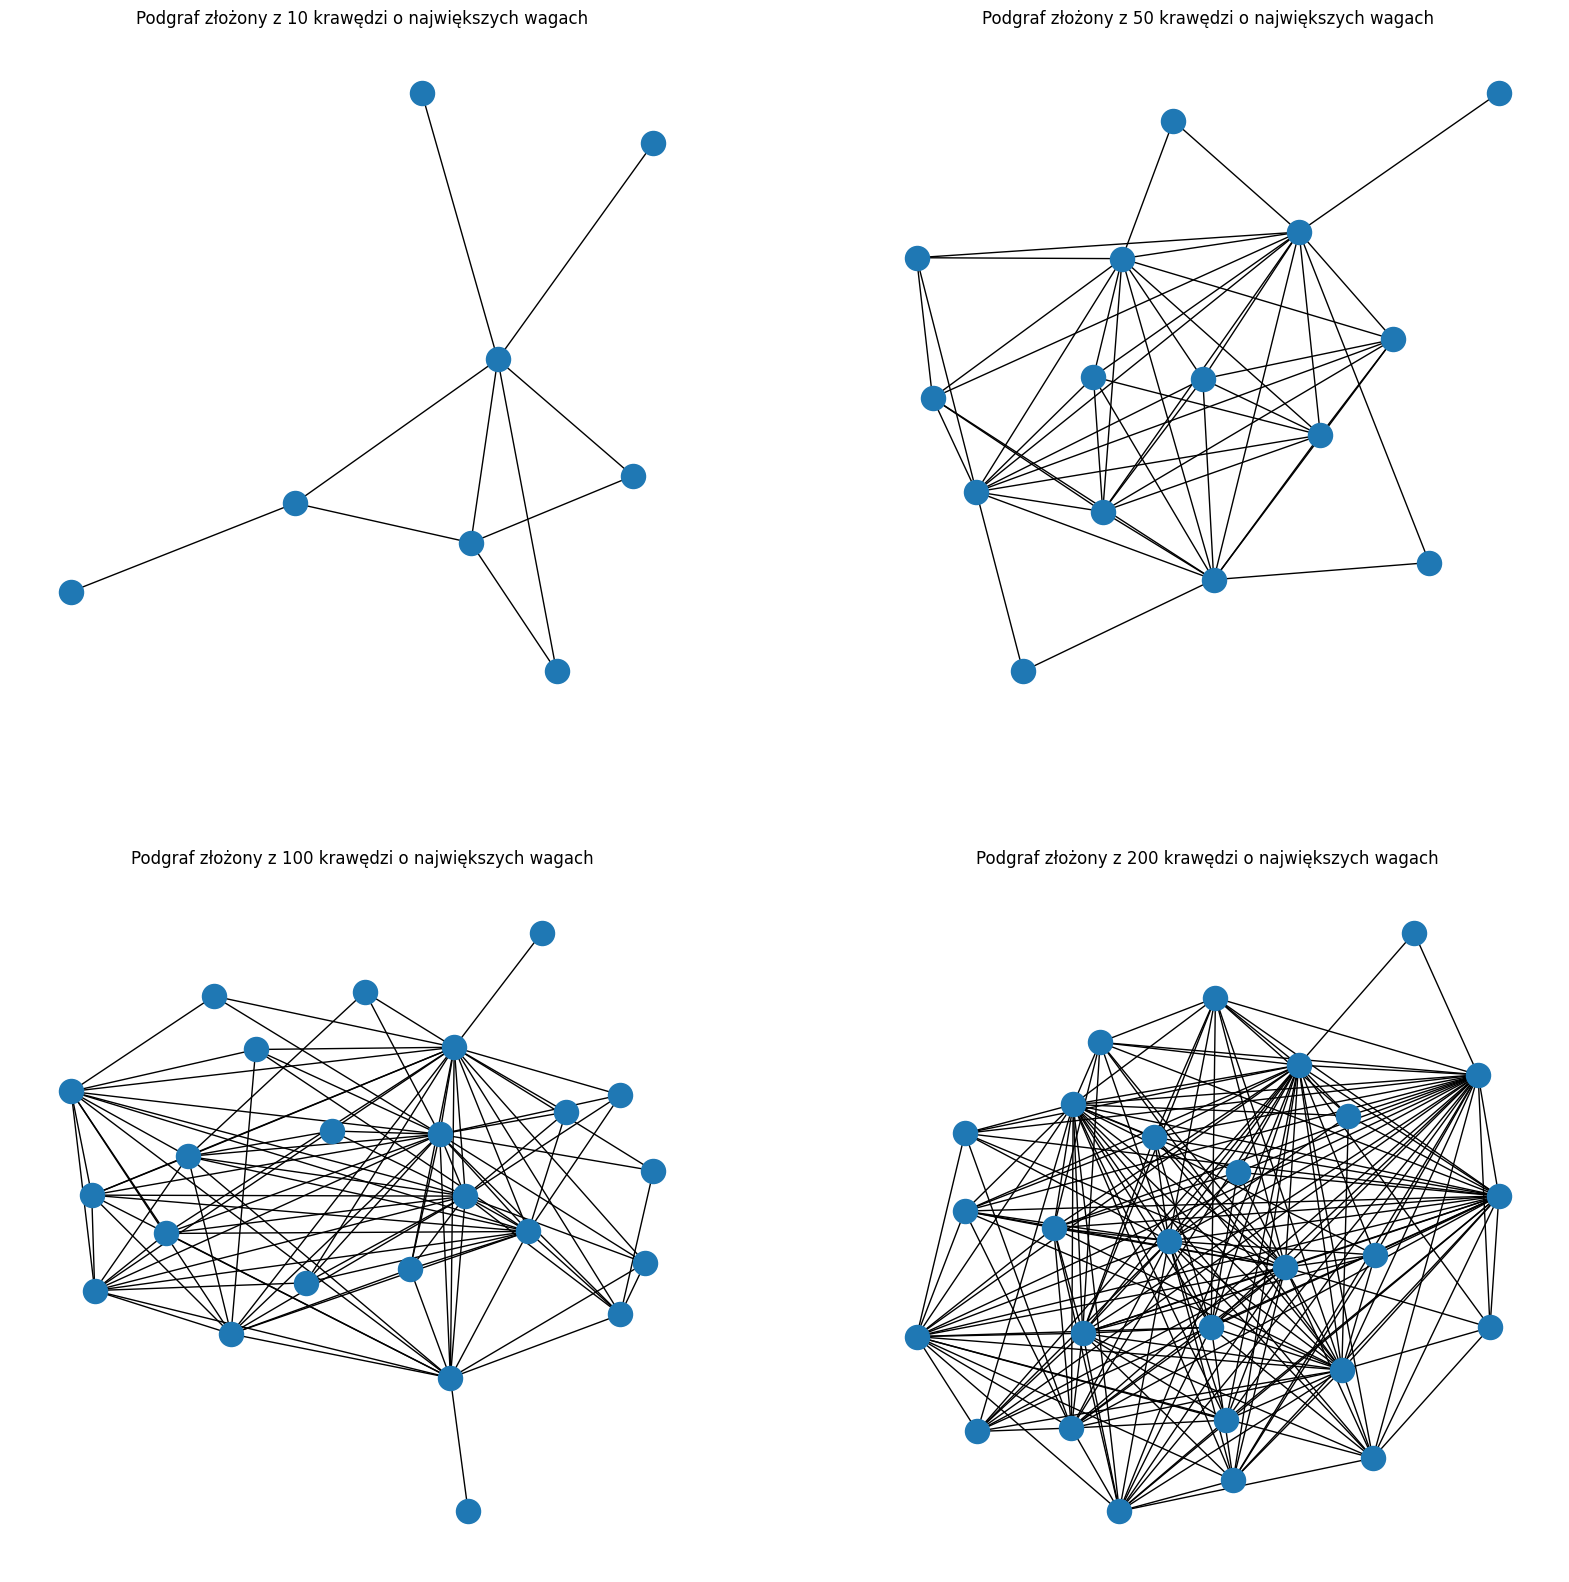

[('Frans Timmermans (Executive Vice-President)',
  'Thierry Breton (Commissioner)',
  {'weight': 349}),
 ('Margrethe Vestager (Executive Vice-President)',
  'Thierry Breton (Commissioner)',
  {'weight': 349}),
 ('Frans Timmermans (Executive Vice-President)',
  'Johannes Hahn (Commissioner)',
  {'weight': 336}),
 ('Frans Timmermans (Executive Vice-President)',
  'Margrethe Vestager (Executive Vice-President)',
  {'weight': 294}),
 ('Johannes Hahn (Commissioner)',
  'Thierry Breton (Commissioner)',
  {'weight': 294}),
 ('Thierry Breton (Commissioner)',
  'Ursula von der Leyen (President)',
  {'weight': 276}),
 ('Frans Timmermans (Executive Vice-President)',
  'Valdis Dombrovskis (Executive Vice-President)',
  {'weight': 273}),
 ('Thierry Breton (Commissioner)',
  'Valdis Dombrovskis (Executive Vice-President)',
  {'weight': 267}),
 ('Nicolas Schmit (Commissioner)',
  'Thierry Breton (Commissioner)',
  {'weight': 255}),
 ('Didier Reynders (Commissioner)',
  'Margrethe Vestager (Executive 

In [126]:
most_popular_pairs = sorted(G.edges.data(), key=lambda x: x[2]['weight'], reverse=True)

plt.figure(figsize=(20, 20))

sub_G10 = G.edge_subgraph([(x[0], x[1]) for x in most_popular_pairs[:10]])
plt.subplot(221)
plt.title('Podgraf złożony z 10 krawędzi o największych wagach')
nx.draw(sub_G10)

sub_G50 = G.edge_subgraph([(x[0], x[1]) for x in most_popular_pairs[:50]])
plt.subplot(222)
plt.title('Podgraf złożony z 50 krawędzi o największych wagach')
nx.draw_kamada_kawai(sub_G50)

sub_G100 = G.edge_subgraph([(x[0], x[1]) for x in most_popular_pairs[:100]])
plt.subplot(223)
plt.title('Podgraf złożony z 100 krawędzi o największych wagach')
nx.draw_kamada_kawai(sub_G100)

sub_G200 = G.edge_subgraph([(x[0], x[1]) for x in most_popular_pairs[:200]])
plt.subplot(224)
plt.title('Podgraf złożony z 200 krawędzi o największych wagach')
nx.draw_kamada_kawai(sub_G200)

plt.show()

most_popular_pairs

In [145]:
def analyze_subs(sub_graph: nx.Graph):
    print(len(sub_graph.nodes))
    print(sorted(dict(sub_graph.degree).items(), key=lambda x: x[1], reverse=True))
    cliques = list()
    for clique in nx.find_cliques(sub_graph):
        cliques.append(clique)

    print(len([x for x in [(len(x), x) for x in sorted(cliques, key=lambda x: len(x), reverse=True)] if x[0] == 12]))
    print(sorted(nx.centrality.degree_centrality(sub_graph).items(), key=lambda x: x[1], reverse=True))
    return cliques

In [146]:
cliques = analyze_subs(sub_G200)

27
[('Frans Timmermans (Executive Vice-President)', 26), ('Johannes Hahn (Commissioner)', 26), ('Thierry Breton (Commissioner)', 25), ('Margrethe Vestager (Executive Vice-President)', 24), ('Ursula von der Leyen (President)', 24), ('Valdis Dombrovskis (Executive Vice-President)', 24), ('Nicolas Schmit (Commissioner)', 23), ('Didier Reynders (Commissioner)', 20), ('Maroš Šefčovič (Vice-President)', 18), ('Mairead McGuinness (Commissioner)', 16), ('Virginijus Sinkevičius (Commissioner)', 16), ('Kadri Simson (Commissioner)', 15), ('Janusz Wojciechowski (Commissioner)', 14), ('Adina-Ioana Vălean (Commissioner)', 12), ('Paolo Gentiloni (Commissioner)', 12), ('Věra Jourová (Vice-President)', 12), ('Elisa Ferreira (Commissioner)', 11), ('Margaritis Schinas (Vice-President)', 11), ('Stella Kyriakides (Commissioner)', 11), ('Jutta Urpilainen (Commissioner)', 10), ('Mariya Gabriel (Commissioner)', 10), ('Ylva Johansson (Commissioner)', 9), ('Iliana Ivanova (Commissioner)', 8), ('Phil Hogan (Comm

In [150]:
biggest_cliques = sorted(cliques, key=lambda x: len(x), reverse=True)[:5]

In [155]:
for clique in biggest_cliques:
    parties = defaultdict(int)
    for member in clique:
        parties[G.nodes.data()[member]['political_group']] += 1
    print(parties)

parties = defaultdict(int)
for member in G.nodes.data():
    parties[member[1]['political_group']] += 1
print(parties)

defaultdict(<class 'int'>, {'S&D': 3, 'EPP': 6, 'Renew': 3})
defaultdict(<class 'int'>, {'S&D': 4, 'EPP': 5, 'Renew': 3})
defaultdict(<class 'int'>, {'S&D': 3, 'EPP': 5, 'Renew': 3, 'Greens/EFA': 1})
defaultdict(<class 'int'>, {'S&D': 4, 'EPP': 4, 'Renew': 3, 'Greens/EFA': 1})
defaultdict(<class 'int'>, {'S&D': 3, 'EPP': 4, 'Renew': 3, 'Greens/EFA': 1, 'ECR': 1})
defaultdict(<class 'int'>, {'EPP': 14, 'Renew': 5, 'S&D': 9, 'ECR': 1, 'Greens/EFA': 1})


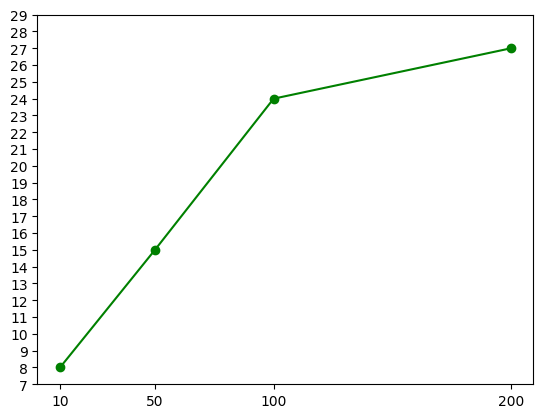

In [141]:
plt.plot([10, 50, 100, 200], [8, 15, 24, 27], '-o', color='green')
plt.xticks([10, 50, 100, 200])
plt.yticks(range(7, 30))
plt.show()

In [103]:
G.nodes['Frans Timmermans (Executive Vice-President)']

{'age': 58,
 'education': ['Law', 'Humanities and Languages'],
 'political_group': 'S&D'}

In [209]:
same_party_edges = list()
different_party_edges = list()
for edge in G.edges.data():
    if G.nodes.data()[edge[0]]['political_group'] == G.nodes.data()[edge[1]]['political_group']:
        same_party_edges.append(edge)
    else:
        different_party_edges.append(edge)

print(len(same_party_edges))
print(np.mean([x[2]['weight'] for x in same_party_edges]))
print(np.median([x[2]['weight'] for x in same_party_edges]))
print('======================')
print(len(different_party_edges))
print(np.mean([x[2]['weight'] for x in different_party_edges]))
print(np.median([x[2]['weight'] for x in different_party_edges]))


129
55.95348837209303
34.0
277
56.667870036101085
33.0


In [ ]:
G.nodes

In [166]:
def analyse_communities(graph):
    communities = nx.community.louvain_communities(graph, weight='weight')
    for community in communities:
        parties = defaultdict(list)
        education = defaultdict(list)
        for member in community:
            parties[graph.nodes.data()[member]['political_group']].append(member)
            for member_education in graph.nodes.data()[member]['education']:
                education[member_education].append(member)
        print(len(community))
        # print(dict(parties), dict(education))
        print({k: len(v) for k, v in parties.items()}, '\n', {k: len(v) for k, v in education.items()})

In [182]:
analyse_communities(Gs)

6
{'Renew': 3, 'EPP': 1, 'S&D': 2} 
 {'Law': 1, 'Economics': 3, 'Education and Pedagogy': 1, 'Political Science': 1, 'History': 1}
6
{'S&D': 2, 'EPP': 3, 'Greens/EFA': 1} 
 {'Law': 3, 'Humanities and Languages': 2, 'Economics': 4, 'Social Sciences': 2, 'International Relations': 1}
1
{'S&D': 1} 
 {'Political Science': 1, 'Social Sciences': 1}
1
{'S&D': 1} 
 {'Economics': 1, 'Engineering': 1, 'Mathematics': 1}
10
{'EPP': 7, 'ECR': 1, 'Renew': 1, 'S&D': 1} 
 {'Mathematics': 1, 'Security and Defence Studies': 1, 'International Relations': 2, 'Law': 4, 'Public Administration and Policy': 1, 'Economics': 1, 'Public Health and Medicine': 1, 'Psychology': 1, 'Philosophy': 1, 'Engineering': 1, 'Humanities and Languages': 1, 'Political Science': 1}
6
{'Renew': 1, 'S&D': 2, 'EPP': 3} 
 {'Law': 1, 'Political Science': 1, 'Education and Pedagogy': 2, 'Mathematics': 1, 'Economics': 2, 'Engineering': 1, 'Humanities and Languages': 1, 'International Relations': 1}


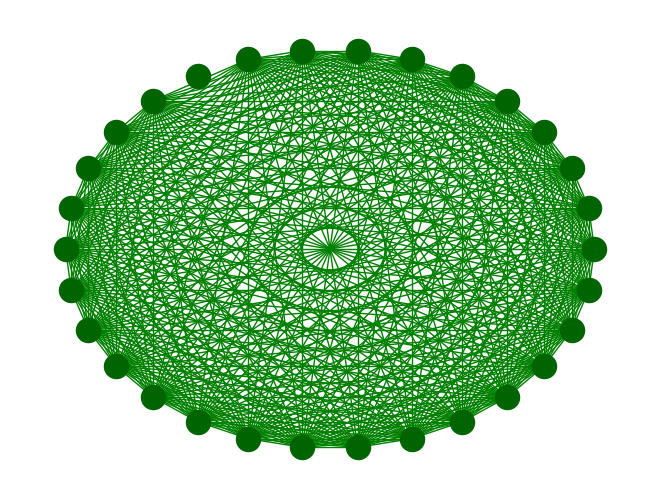

In [218]:
# G1 = deepcopy(Gs)
# G1.remove_node('Josep Borrell (Vice-President)')
# print(len(G1.nodes))


nx.draw_circular(G, node_color='darkgreen', edge_color='green')
# nx.draw(G)

In [187]:
nx.average_clustering(Gs)

0.36717245717245717

In [194]:
for name in [
    'Maroš Šefčovič (Vice-President)',
    'Virginijus Sinkevičius (Commissioner)',
    'Thierry Breton (Commissioner)'
]:
    data = Gs.nodes.data()[name]
    print(name, data['political_group'], data['age'], data['education'])

Maroš Šefčovič (Vice-President) S&D 53 ['Economics', 'International Relations', 'Law']
Virginijus Sinkevičius (Commissioner) Greens/EFA 29 ['Economics', 'Social Sciences']
Thierry Breton (Commissioner) EPP 64 ['Engineering']


In [192]:
sorted(nx.centrality.betweenness_centrality(Gs, weight='weight').items(), key=lambda x: x[1], reverse=True)

[('Maroš Šefčovič (Vice-President)', 0.5184729064039408),
 ('Virginijus Sinkevičius (Commissioner)', 0.410919540229885),
 ('Thierry Breton (Commissioner)', 0.382183908045977),
 ('Frans Timmermans (Executive Vice-President)', 0.13341543513957307),
 ('Margrethe Vestager (Executive Vice-President)', 0.12561576354679804),
 ('Věra Jourová (Vice-President)', 0.12315270935960591),
 ('Valdis Dombrovskis (Executive Vice-President)', 0.1018062397372742),
 ('Olivér Várhelyi (Commissioner)', 0.06486042692939246),
 ('Adina-Ioana Vălean (Commissioner)', 0.06403940886699508),
 ('Mariya Gabriel (Commissioner)', 0.06403940886699508),
 ('Paolo Gentiloni (Commissioner)', 0.06403940886699508),
 ('Ursula von der Leyen (President)', 0.05541871921182266),
 ('Johannes Hahn (Commissioner)', 0.04885057471264369),
 ('Nicolas Schmit (Commissioner)', 0.008620689655172414),
 ('Didier Reynders (Commissioner)', 0.005747126436781608),
 ('Dubravka Šuica (Vice-President)', 0.0),
 ('Elisa Ferreira (Commissioner)', 0.0),
